## メトロポリス法
- イジングモデルを考える
- 参考: https://www.smapip.is.tohoku.ac.jp/~smapip/2003/tutorial/presentation/koji-hukushima.pdf

### 1. モデル化
#### - 各格子点にスピン変数 $S_{i} = \pm 1$
$$X = \left(S_{1}, S_{2}, \cdots, S_{N}\right)$$

#### - 状態の数は $2^{N}$

#### - 確率分布にギブズ関数(エネルギー関数)を仮定
$$P(X) = \frac{\displaystyle exp\left(\frac{-E(X)}{T}\right)}{\displaystyle\sum_{X'}exp\left(-\frac{E(X)}{T}\right)}$$

$$E(X) = - \displaystyle\sum_{(i,j)}J_{ij}S_{i}S_{j}$$

#### - 相互作用 $J_{ij} = J$ の場合
- $S_{i}S_{j} = 1$ : $-J$ エネルギーが下がる
- $S_{i}S_{j} = -1$ : $J$ エネルギーが上がる

#### - 更新
- $X$ の次の状態はスピン状態を一つだけ変えた $X'$ との確率の比から計算
- 一様分布からランダムに選んだ $r \in [0,1]$ について
$$
X^{t+1} =
\begin{cases}
    X' & r \le \displaystyle \frac{P(X')}{P(X)} \\
    X  & otherwise
\end{cases}
$$

### 2. 一次元イジングモデル


温度: 25
500/500

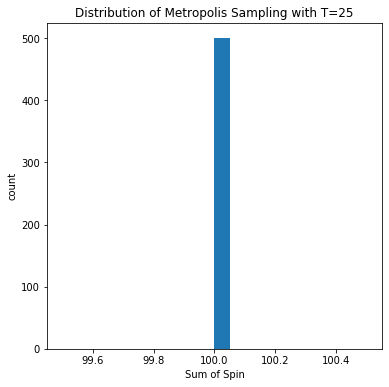


温度: 50
500/500

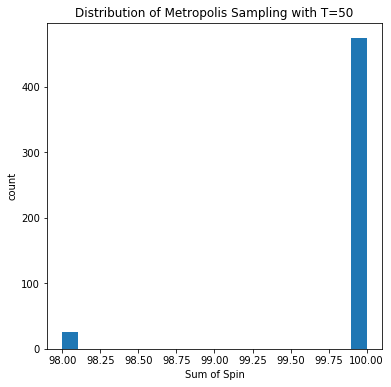


温度: 75
500/500

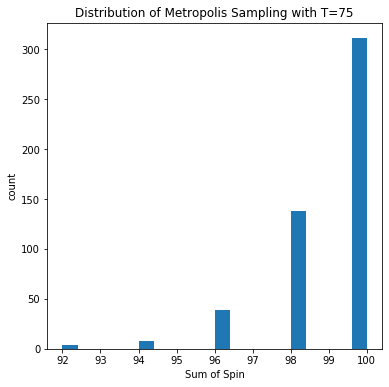


温度: 100
500/500

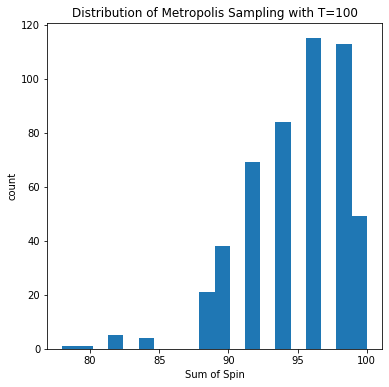


温度: 125
500/500

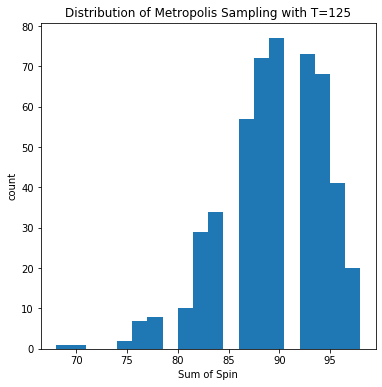


温度: 150
500/500

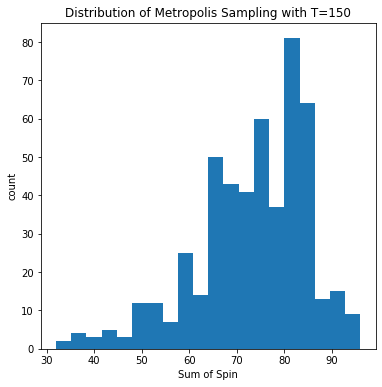


温度: 175
500/500

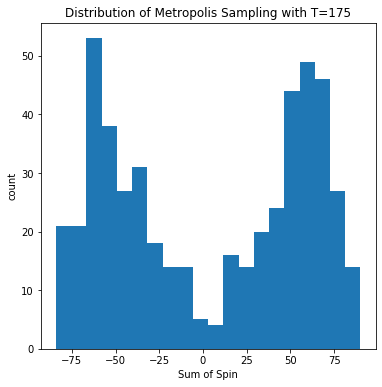


温度: 200
500/500

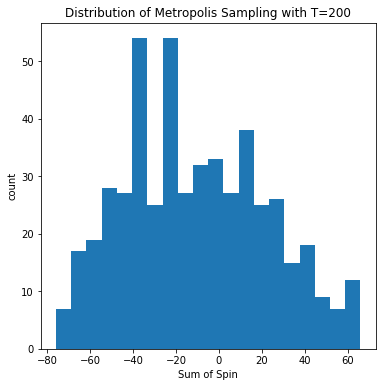


温度: 225
500/500

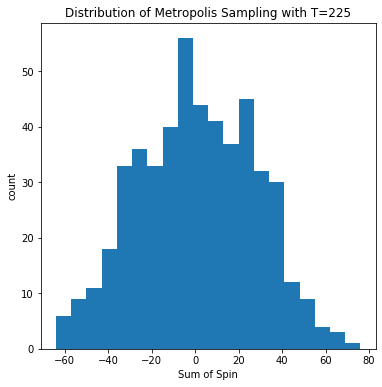


温度: 250
500/500

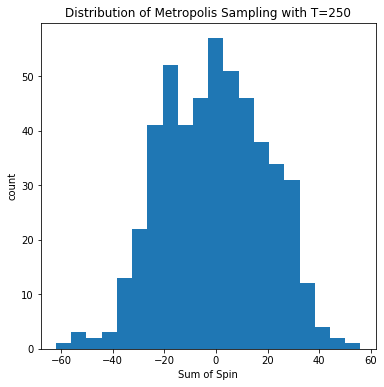


温度: 275
500/500

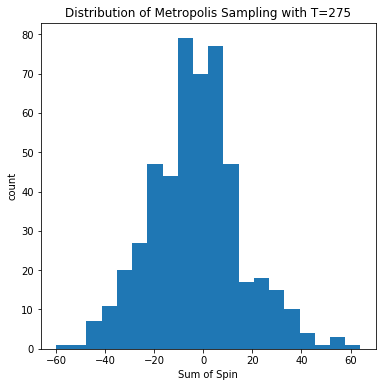


温度: 300
500/500

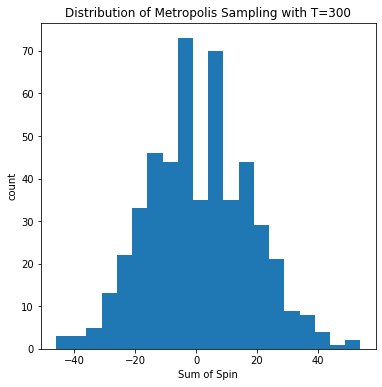


温度: 400
500/500

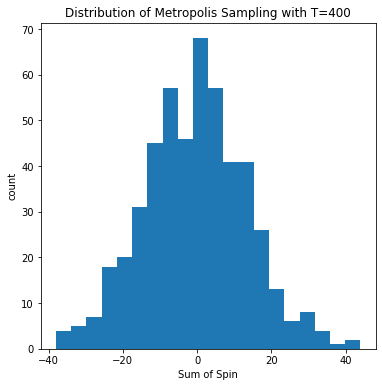


温度: 500
500/500

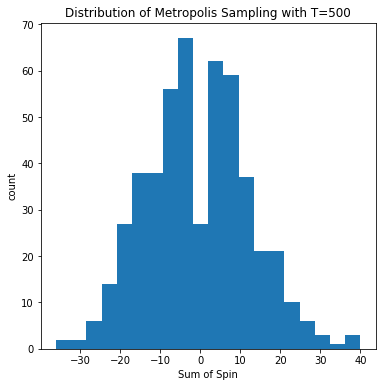


温度: 1000
500/500

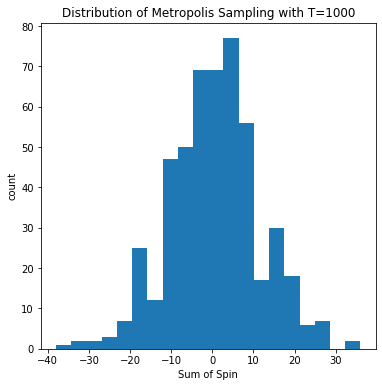


温度: 2000
500/500

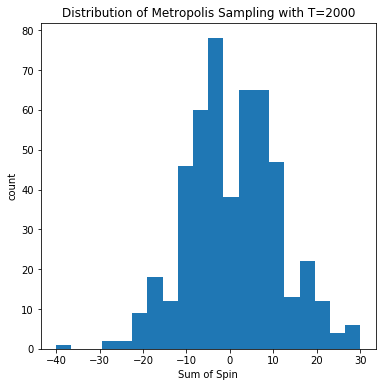


温度: 3000
500/500

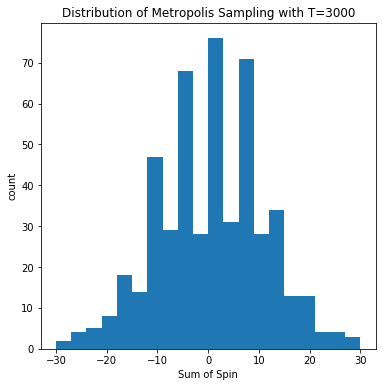


温度: 4000
500/500

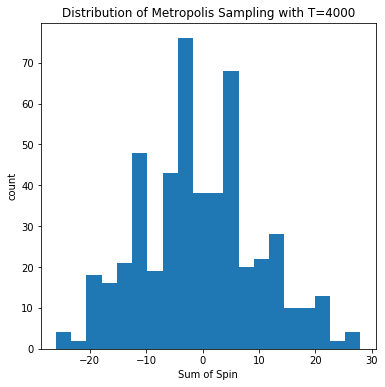


温度: 5000
500/500

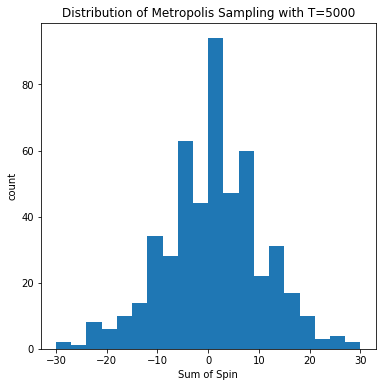


温度: 10000
500/500

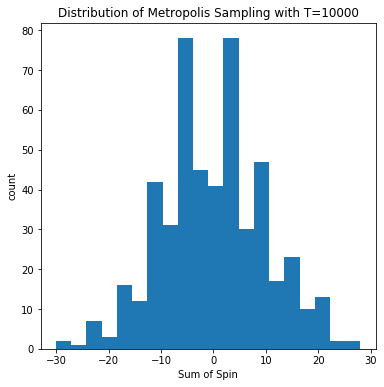

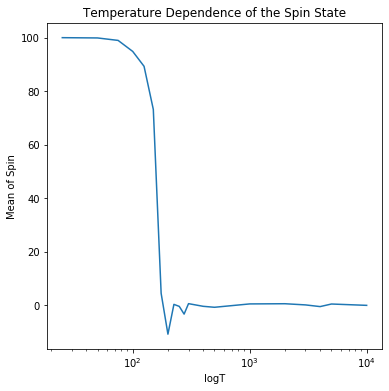

In [172]:
import matplotlib.pyplot as plt
import numpy as np
import copy

def calc_energy(X:np.ndarray, J:float=1., T:float=1.):
    interactions = np.dot(X.reshape(-1,1), X.reshape(1,-1))
    interactions -= np.diag(np.ones_like(interactions[0]))
#     interactions = np.triu(interactions)
    E = J / T * np.sum(interactions)
    return E

def calc_transition(X_t:np.ndarray, X_tp1:np.ndarray, J:float=1., T:float=1.):
    E_t   = calc_energy(X_t, J=J, T=T)
    E_tp1 = calc_energy(X_tp1, J=J, T=T)
    return np.exp(E_tp1) / np.exp(E_t)

def update_X(X_t:np.ndarray, X_tp1:np.ndarray, J:float=1., T:float=1.):
    transition = calc_transition(X_t, X_tp1, J=J, T=T)
    r = np.random.uniform(0,1)
    return X_tp1 if r <= transition else X_t

def sample_spin(X:np.ndarray):
    # if not copy, global X is overwitten
    X = copy.copy(X)
    k = np.random.randint(X.shape[1])
    X[:,k] *= -1
    return X

# parameters
size = 100
sample_size = 500
burn_in = 100
sampling_step = 50
J = 1.
T = 100.

Ts = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 400, 500, 1000, 2000, 3000, 4000, 5000, 10000]
I = {}
for T in Ts:
    # initialize
    samples = []
    steps = 0
    X_t = np.ones((1,size))
    print(f'\n温度: {T}')
    while len(samples) < sample_size:
        X_tp1 = sample_spin(X_t)
        X_t   = update_X(X_t, X_tp1, J=J, T=T)
        steps += 1
        if (steps > burn_in) and (steps%sampling_step==0):
            samples.append(X_t)
            print(f'\r{len(samples)}/{sample_size}', end='')
    sum_samples = [np.sum(x) for x in samples]
    I[T] = np.mean(sum_samples)
    plt.figure(figsize=(6,6))
    plt.hist(sum_samples, bins=20)
    plt.title(f'Distribution of Metropolis Sampling with T={T}')
    plt.xlabel('Sum of Spin')
    plt.ylabel('count')
    plt.show()
    plt.close()

x = np.array(list(I.keys()))
y = np.array(list(I.values()))
plt.figure(figsize=(6,6))
plt.plot(x,y)
plt.xscale("log")
plt.xlabel('logT')
plt.ylabel('Mean of Spin')
plt.title('Temperature Dependence of the Spin State')
plt.show()
plt.close()